In [1]:
pip install citipy

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import time
import json
import scipy.stats as st

#import api key from configs.py file
from configs import api_key

#city data based on lat. and long.
from citipy import citipy

#output file (csv)
output_data_file = "output_data/cities.csv"

#Range of latitudes and logitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

#np.random.seed(1)
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

In [4]:
#set up dataframe and create empty columns for the data to be entered into
cities_df = pd.DataFrame({"City": cities})
cities_df["Lat"] = ""
cities_df["Lng"] = ""
cities_df["Max Temp"] = ""
cities_df["Humidity"] = ""
cities_df["Cloudiness"] = ""
cities_df["Wind Speed"] = ""
cities_df["Country"] = ""
cities_df["Date"] = ""

#base url ready for the city name to be added to the end
base_url = f'http://api.openweathermap.org/data/2.5/weather?appid={api_key}&q='

#starting data retrieval
print("Beginning Data Retrieval")
print("-----------------------------")
#go through cities_df by city name and start entering in the info from the API
for index, row in cities_df.iterrows():
    #get city from df 
    city_name = row["City"]
    #assemble url and make api call
    response = requests.get(base_url + city_name).json()
    
    #try to fill in the df, else print skipping
    try:
        cities_df.loc[index, 'Lat'] = response['coord']['lat']
        cities_df.loc[index, 'Lng'] = response['coord']['lon']
        cities_df.loc[index, 'Max Temp'] = response['main']['temp_max']
        cities_df.loc[index, 'Humidity'] = response['main']['humidity']
        cities_df.loc[index, 'Cloudiness'] = response['clouds']['all']
        cities_df.loc[index, 'Wind Speed'] = response['wind']['speed']
        cities_df.loc[index, 'Country'] = response['sys']['country']
        cities_df.loc[index, 'Date'] = response['dt']
        print(f'Processing record {index} | {city_name}')
    except (KeyError, IndexError):
        print("City not found. Skipping...")
        #delete that row from df
        cities_df = cities_df.drop([index])

print("-----------------------------")        
print("Data Retrieval Complete")
print("-----------------------------")

#convert Max temp from Kelvin to Fahrenheit and Wind Speed from m/s to mph
cities_df["Max Temp"] = cities_df["Max Temp"] * 1.8 - 459.67
cities_df["Wind Speed"] = cities_df["Wind Speed"] / 0.44704

#delete rows with NAs
cities_df = cities_df.dropna()

Beginning Data Retrieval
-----------------------------
Processing record 0 | saint george
Processing record 1 | busselton
Processing record 2 | pimentel
Processing record 3 | rikitea
Processing record 4 | faanui
Processing record 5 | kavaratti
Processing record 6 | orumiyeh
City not found. Skipping...
Processing record 8 | tiksi
Processing record 9 | east london
Processing record 10 | port alfred
City not found. Skipping...
City not found. Skipping...
Processing record 13 | dunedin
Processing record 14 | albany
Processing record 15 | tessalit
Processing record 16 | kodiak
Processing record 17 | yellowknife
Processing record 18 | namatanai
Processing record 19 | paldiski
Processing record 20 | saskylakh
City not found. Skipping...
Processing record 22 | galesong
Processing record 23 | makokou
Processing record 24 | klaksvik
Processing record 25 | pevek
Processing record 26 | torquay
Processing record 27 | jamestown
Processing record 28 | mar del plata
Processing record 29 | mahebourg
Pr

Processing record 252 | levelland
Processing record 253 | caravelas
Processing record 254 | narsaq
Processing record 255 | niquero
Processing record 256 | ghanzi
Processing record 257 | mehamn
Processing record 258 | bam
Processing record 259 | gat
Processing record 260 | naberera
City not found. Skipping...
Processing record 262 | khoy
Processing record 263 | novo aripuana
Processing record 264 | viransehir
Processing record 265 | askino
Processing record 266 | tuatapere
Processing record 267 | nieuw amsterdam
Processing record 268 | hobyo
Processing record 269 | salalah
Processing record 270 | aklavik
Processing record 271 | brownwood
Processing record 272 | montclair
Processing record 273 | buala
Processing record 274 | bac lieu
Processing record 275 | plymouth
Processing record 276 | alta floresta
Processing record 277 | batagay-alyta
Processing record 278 | belyy yar
Processing record 279 | xai-xai
Processing record 280 | chokurdakh
Processing record 281 | wanning
Processing recor

Processing record 504 | santiago de cao
Processing record 505 | olafsvik
Processing record 506 | yuci
Processing record 507 | nenjiang
Processing record 508 | beyneu
Processing record 509 | nador
Processing record 510 | qostanay
City not found. Skipping...
Processing record 512 | majene
Processing record 513 | kahna nau
Processing record 514 | nuuk
Processing record 515 | rypefjord
Processing record 516 | santa isabel
Processing record 517 | clyde river
Processing record 518 | talnakh
Processing record 519 | robertson
Processing record 520 | itarema
Processing record 521 | atar
Processing record 522 | ribeira brava
Processing record 523 | praxedis guerrero
Processing record 524 | kautokeino
Processing record 525 | te anau
Processing record 526 | hammerfest
Processing record 527 | fort-shevchenko
Processing record 528 | halifax
Processing record 529 | vila velha
Processing record 530 | corinth
Processing record 531 | taltal
Processing record 532 | bani
City not found. Skipping...
Proces

In [5]:
#export data to csv
cities_df.to_csv('../output_data/cities_df.csv')

#display number of values for each column in df
cities_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [6]:
#display the dataframe
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saint george,37.1,-113.58,73.4,20,1,9.17144,US,1593089596
1,busselton,-33.65,115.33,57.002,55,5,8.52273,AU,1593089596
2,pimentel,-6.84,-79.93,60.8,87,92,6.9345,PE,1593089596
3,rikitea,-23.12,-134.97,72.374,74,2,13.6901,PF,1593089596
4,faanui,-16.48,-151.75,78.566,88,6,16.8441,PF,1593089596


In [7]:
#inspect df and determine number of cities with over 100% humidity 
low_humidity_df = cities_df[cities_df.Humidity <= 100]
print(f'The number of cities with over 100% humidity is {len(cities_df) - len(low_humidity_df)}.')

The number of cities with over 100% humidity is 0.


In [8]:
#  Get the indices of cities that have humidity over 100%.
over_100_indexes = cities_df[cities_df.Humidity > 100].index
over_100_indexes

Int64Index([], dtype='int64')

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data= cities_df
for x in over_100_indexes:
    clean_city_data = cities_df.drop([x])

clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saint george,37.1,-113.58,73.4,20,1,9.17144,US,1593089596
1,busselton,-33.65,115.33,57.002,55,5,8.52273,AU,1593089596
2,pimentel,-6.84,-79.93,60.8,87,92,6.9345,PE,1593089596
3,rikitea,-23.12,-134.97,72.374,74,2,13.6901,PF,1593089596
4,faanui,-16.48,-151.75,78.566,88,6,16.8441,PF,1593089596


In [10]:
# Extract relevant fields from the data frame
lat = clean_city_data.Lat
max_temp = clean_city_data["Max Temp"]
humid = clean_city_data.Humidity
cloud = clean_city_data.Cloudiness
wind = clean_city_data['Wind Speed']

# Export the City_Data into a csv
clean_city_data.to_csv('../output_data/clean_city_data.csv', index = False)

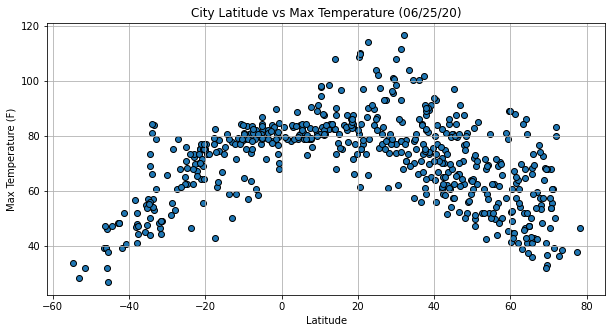

In [11]:
#Latitude vs Temperature Plot

#save today's date in the today variable
today = pd.to_datetime('today').strftime("%m/%d/%y")
fig = plt.figure(figsize = (10,5))

#calling scatter plot
plt.scatter(lat, max_temp, edgecolors = "black")
plt.title(f'City Latitude vs Max Temperature ({today})')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

#saving figure in the output_data directory
fig.savefig('../output_data/lati_vs_temp.png')
plt.show()

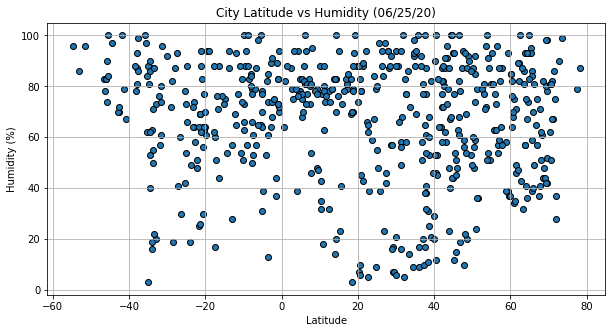

In [12]:
#Latitude vs Humidity Plot

fig = plt.figure(figsize = (10,5))

#call scatter plot
plt.scatter(lat, humid, edgecolors = "black")
plt.title(f'City Latitude vs Humidity ({today})')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

#saving figure to the output_data directory
fig.savefig('../output_data/lat_vs_humid.png')
plt.show()

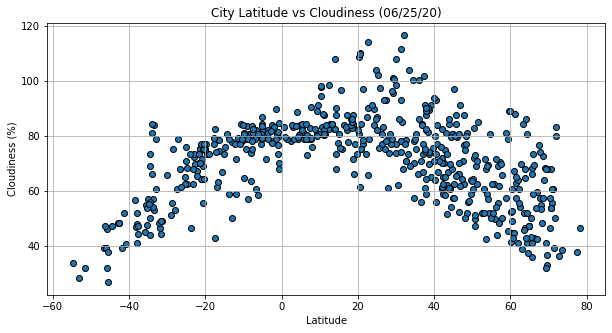

In [13]:
#Latitude vs Cloudiness Plot

fig = plt.figure(figsize = (10,5))

#calling scatter plot
plt.scatter(lat, max_temp, edgecolors = "black")
plt.title(f'City Latitude vs Cloudiness ({today})')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

#saving file to the output_data directory
fig.savefig('../output_data/lat_vs_cloudiness.png')
plt.show()

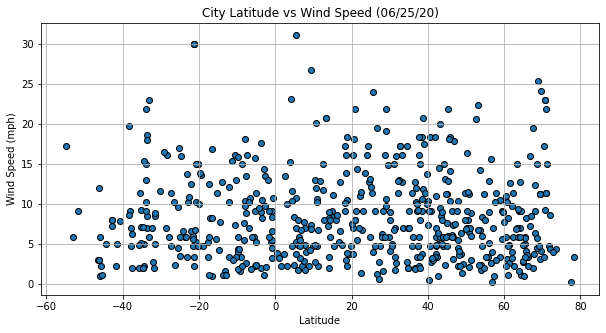

In [14]:
#Latitude vs Wind Speed Plot

fig = plt.figure(figsize = (10,5))

#calling scatter plot
plt.scatter(lat, wind, edgecolors = "black")
plt.title(f'City Latitude vs Wind Speed ({today})')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

#saving plot to the output_data directory
fig.savefig('../output_data/lat_vs_wind_speed.png')
plt.show()

In [15]:
# OPTIONAL: Create a function to create Linear Regression plots

#input is 2 lists and returns regress_values, the line equation of best fit, and the r correlation
def lin_regress(list_x, list_y):
    slope, int, r, p, st_err = st.linregress(list_x, list_y)
    regress_values = slope*list_x + int
    line_eq = f'y = {round(slope, 2)}x + {round(int,2)}'
    return regress_values, line_eq, r

In [16]:
# Create Northern and Southern Hemisphere DataFrames

north_hem = clean_city_data[clean_city_data["Lat"] >= 0]
south_hem = clean_city_data[clean_city_data["Lat"] < 0]

# All Northern Hemisphere Plots

In [17]:
#Preparing data for all the northern hemisphere plots

lat = north_hem.Lat.astype(float)
max_temp = north_hem["Max Temp"].astype(float)
humid = north_hem.Humidity.astype(float)
cloud = north_hem.Cloudiness.astype(float)
wind = north_hem['Wind Speed'].astype(float)

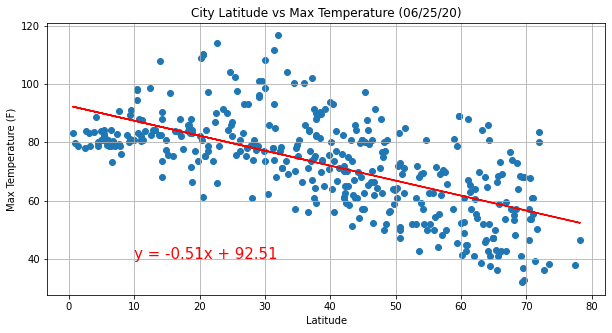

The r-squared is: 0.4149679205534257


In [18]:
#Northern Hemisphere - Max Temp vs Latitude Linear Regression

#calling the linear regression function and saving the 3 outputs(regress_values, line_eq, and r) to the regress variable
regress = lin_regress(lat, max_temp)

fig = plt.figure(figsize = (10,5))

#calling the scatter plot
plt.scatter(lat, max_temp)
plt.title(f'City Latitude vs Max Temperature ({today})')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

#plots the linear regression line
plt.plot(lat, regress[0], color = "red")
#adds the linear regression equation to the plot
plt.annotate(regress[1], (10,40), fontsize = 15, color = "red" )

#saves the file to the output_data directory
fig.savefig('../output_data/north_lat_vs_temp.png')
plt.show()

#prints the r-squared value
print(f'The r-squared is: {pow(regress[2], 2)}')

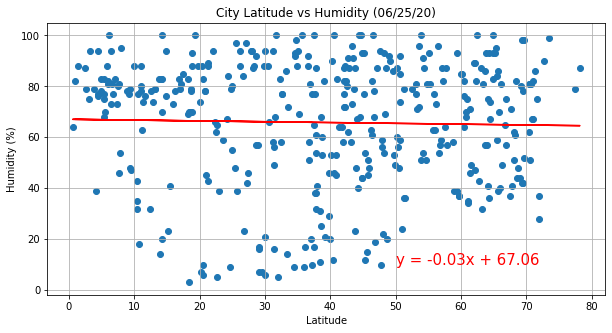

The r-squared is: 0.0006869539623642917


In [19]:
#Northern Hemisphere - Humidity (%) vs Latitude Linear Regression

#calling the linear regression function and saving the 3 outputs(regress_values, line_eq, and r) to the regress variable
regress = lin_regress(lat, humid)

fig = plt.figure(figsize = (10,5))

#call scatter plot
plt.scatter(lat, humid)
plt.title(f'City Latitude vs Humidity ({today})')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

#plots the linear regression line
plt.plot(lat, regress[0], color = "red")
#adds the linear regression equation to the plot
plt.annotate(regress[1], (50,10), fontsize = 15, color = "red" )

#saving figure to the output_data directory
fig.savefig('../output_data/north_lat_vs_humid.png')
plt.show()

#prints the r-squared value
print(f'The r-squared is: {pow(regress[2], 2)}')

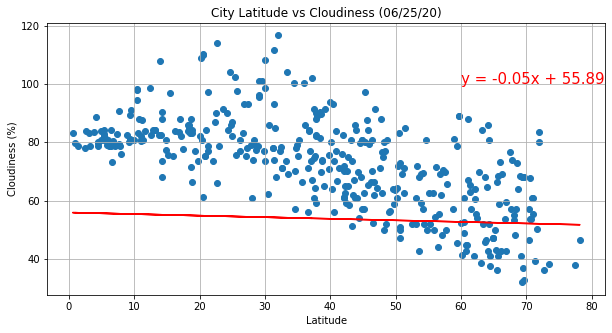

The r-squared is: 0.0007519366354186321


In [20]:
#Northern Hemisphere - Cloudiness (%) vs Latitude Linear Regression

#calling the linear regression function and saving the 3 outputs(regress_values, line_eq, and r) to the regress variable
regress = lin_regress(lat, cloud)

fig = plt.figure(figsize = (10,5))

#calling scatter plot
plt.scatter(lat, max_temp)
plt.title(f'City Latitude vs Cloudiness ({today})')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

#plots the linear regression line
plt.plot(lat, regress[0], color = "red")
#adds the linear regression equation to the plot
plt.annotate(regress[1], (60,100), fontsize = 15, color = "red" )

#saving file to the output_data directory
fig.savefig('../output_data/north_lat_vs_cloudiness.png')
plt.show()

#prints the r-squared value
print(f'The r-squared is: {pow(regress[2], 2)}')

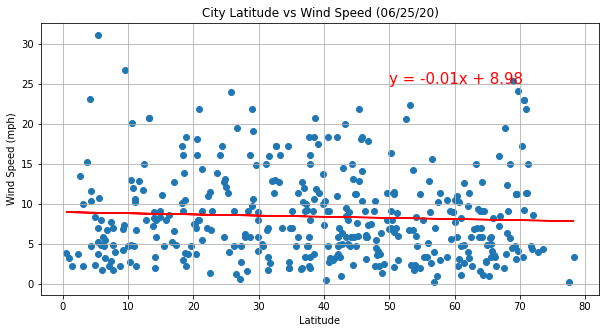

The r-squared is: 0.0027808739266936694


In [21]:
#Northern Hemisphere - Wind Speed (mph) vs Latitude Linear Regression

#calling the linear regression function and saving the 3 outputs(regress_values, line_eq, and r) to the regress variable
regress = lin_regress(lat, wind)

fig = plt.figure(figsize = (10,5))

#calling scatter plot
plt.scatter(lat, wind)
plt.title(f'City Latitude vs Wind Speed ({today})')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

#plots the linear regression line
plt.plot(lat, regress[0], color = "red")
#adds the linear regression equation to the plot
plt.annotate(regress[1], (50,25), fontsize = 15, color = "red" )

#saving plot to the output_data directory
fig.savefig('../output_data/north_lat_vs_wind_speed.png')
plt.show()

#prints the r-squared value
print(f'The r-squared is: {pow(regress[2], 2)}')

# All Southern Hemisphere Plots

In [22]:
#Preparing data for all the northern hemisphere plots

lat = south_hem.Lat.astype(float)
max_temp = south_hem["Max Temp"].astype(float)
humid = south_hem.Humidity.astype(float)
cloud = south_hem.Cloudiness.astype(float)
wind = south_hem['Wind Speed'].astype(float)

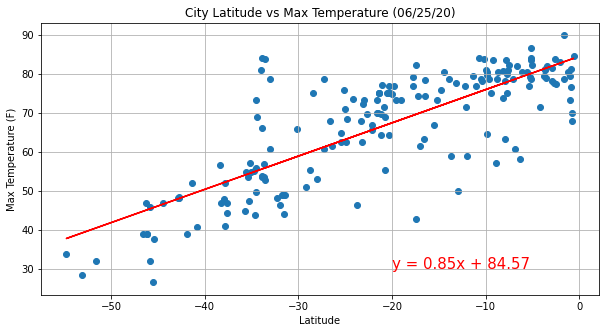

The r-squared is: 0.6412027404894696


In [23]:
#Southern Hemisphere - Max Temp vs Latitude Linear Regression

#calling the linear regression function and saving the 3 outputs(regress_values, line_eq, and r) to the regress variable
regress = lin_regress(lat, max_temp)

fig = plt.figure(figsize = (10,5))

#calling the scatter plot
plt.scatter(lat, max_temp)
plt.title(f'City Latitude vs Max Temperature ({today})')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

#plots the linear regression line
plt.plot(lat, regress[0], color = "red")
#adds the linear regression equation to the plot
plt.annotate(regress[1], (-20,30), fontsize = 15, color = "red" )

#saves the file to the output_data directory
fig.savefig('../output_data/south_lat_vs_temp.png')
plt.show()

#prints the r-squared value
print(f'The r-squared is: {pow(regress[2], 2)}')

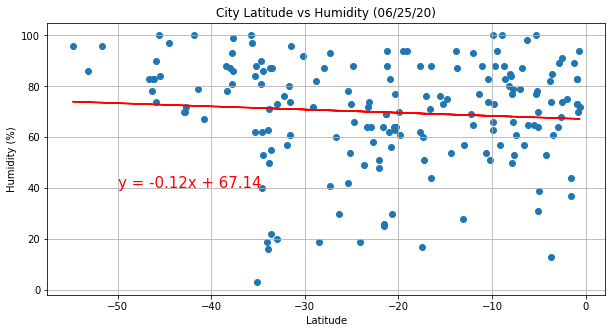

The r-squared is: 0.0068420677311169026


In [24]:
#Southern Hemisphere - Humidity (%) vs Latitude Linear Regression

#calling the linear regression function and saving the 3 outputs(regress_values, line_eq, and r) to the regress variable
regress = lin_regress(lat, humid)

fig = plt.figure(figsize = (10,5))

#call scatter plot
plt.scatter(lat, humid)
plt.title(f'City Latitude vs Humidity ({today})')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

#plots the linear regression line
plt.plot(lat, regress[0], color = "red")
#adds the linear regression equation to the plot
plt.annotate(regress[1], (-50,40), fontsize = 15, color = "red" )

#saving figure to the output_data directory
fig.savefig('../output_data/south_lat_vs_humid.png')
plt.show()

#prints the r-squared value
print(f'The r-squared is: {pow(regress[2], 2)}')

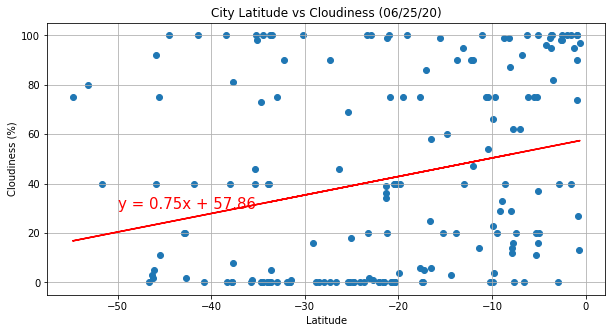

The r-squared is: 0.06832335621916408


In [25]:
#Southern Hemisphere - Cloudiness (%) vs Latitude Linear Regression

#calling the linear regression function and saving the 3 outputs(regress_values, line_eq, and r) to the regress variable
regress = lin_regress(lat, cloud)

fig = plt.figure(figsize = (10,5))

#calling scatter plot
plt.scatter(lat, cloud)
plt.title(f'City Latitude vs Cloudiness ({today})')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

#plots the linear regression line
plt.plot(lat, regress[0], color = "red")
#adds the linear regression equation to the plot
plt.annotate(regress[1], (-50,30), fontsize = 15, color = "red" )

#saving file to the output_data directory
fig.savefig('../output_data/south_lat_vs_cloudiness.png')
plt.show()

#prints the r-squared value
print(f'The r-squared is: {pow(regress[2], 2)}')

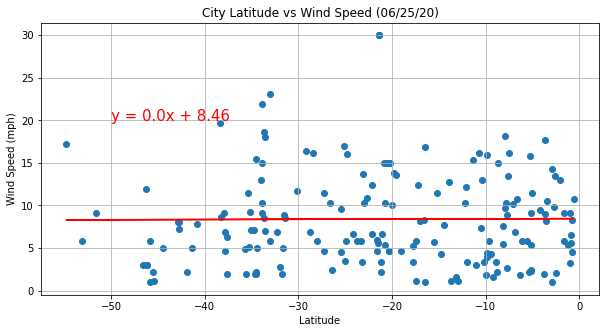

The r-squared is: 4.267501304465138e-05


In [26]:
#Southern Hemisphere - Wind Speed (mph) vs Latitude Linear Regression

#calling the linear regression function and saving the 3 outputs(regress_values, line_eq, and r) to the regress variable
regress = lin_regress(lat, wind)

fig = plt.figure(figsize = (10,5))

#calling scatter plot
plt.scatter(lat, wind)
plt.title(f'City Latitude vs Wind Speed ({today})')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

#plots the linear regression line
plt.plot(lat, regress[0], color = "red")
#adds the linear regression equation to the plot
plt.annotate(regress[1], (-50,20), fontsize = 15, color = "red" )

#saving plot to the output_data directory
fig.savefig('../output_data/south_lat_vs_wind_speed.png')
plt.show()

#prints the r-squared value
print(f'The r-squared is: {pow(regress[2], 2)}')